In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('anonymized.txt')
data

,Date,Amount
0,25May2016,54241.35
1,29May2017,54008.83
2,30Jun2017,54008.82
3,05Jan2017,52704.37
4,23Feb2017,52704.36
...,...,...
2513,14Jun2017,-26263.65
2514,25Aug2014,-27909.36
2515,22Sep2016,-28400.00
2516,23Jun2017,-35570.00


In [17]:
dist = {'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[], 'Dec':[]}
for i in range(data.shape[0]):
    month = data.iloc[i].Date[2:5]
    dist[month].append(data.iloc[i].Amount)

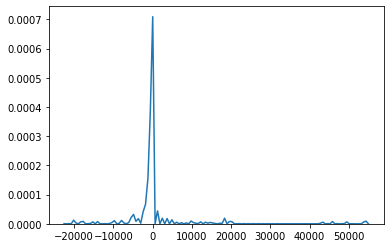

In [42]:
sns.kdeplot(data=dist['May'])

(array([  6.,   5., 191.,   4.,   5.,   5.,   0.,   0.,   2.,   3.]),
 array([-21850.   , -14240.865,  -6631.73 ,    977.405,   8586.54 ,
         16195.675,  23804.81 ,  31413.945,  39023.08 ,  46632.215,
         54241.35 ]),
 <a list of 10 Patch objects>)

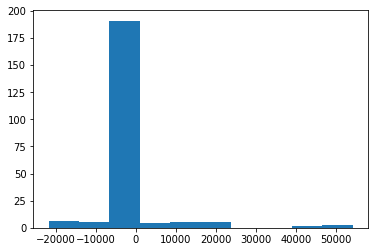

In [44]:
plt.hist(dist['May'])

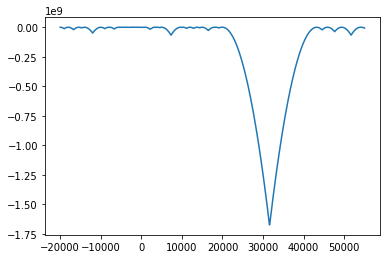

In [32]:
from sklearn.neighbors import KernelDensity
import numpy as np
X = np.array(dist['May']).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
s = np.linspace(-20000,55000,1000)
e = kde.score_samples(s.reshape(-1,1))
plt.plot(s, e)
#my code works but it does not look close the the original histogram

# Question 2
I tried to get the problem but this is a bit trickier that what we got in 7.1 as we have for 4 clusters. I am stuck at using baysian formula to recalculate p_clusters

(1000, 20)


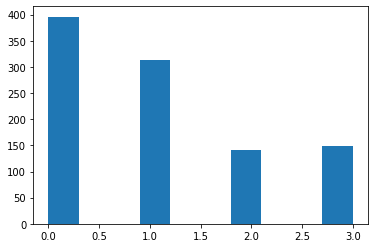

In [55]:


p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)
answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

print(answers.shape)
plt.hist(people)
np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

In [57]:
print(answers.shape)
print(answers)

(1000, 20)
[[False False False ...  True  True False]
 [False False  True ... False  True  True]
 [False False False ... False  True False]
 ...
 [ True False False ... False  True False]
 [ True  True False ...  True  True False]
 [ True  True False ...  True False False]]


In [59]:
print(biases.shape)
print(biases)

(20, 4)
[[0.0164386  0.5820409  0.22718897 0.91699751]
 [0.24102929 0.31953318 0.76337372 0.38964014]
 [0.04777394 0.05610454 0.218333   0.69656303]
 [0.94409519 0.11901838 0.32271273 0.62492536]
 [0.78834851 0.71142724 0.39906991 0.54132741]
 [0.13783838 0.15011096 0.47972113 0.12701934]
 [0.24208667 0.14451623 0.85746702 0.94394471]
 [0.92585784 0.62579681 0.29384736 0.190255  ]
 [0.12814916 0.89041734 0.79452386 0.12550389]
 [0.55214134 0.25993091 0.33426474 0.29240057]
 [0.95621365 0.34058326 0.72790436 0.74810484]
 [0.83450477 0.03105444 0.73482382 0.14608664]
 [0.45578204 0.90696099 0.03827662 0.0087851 ]
 [0.64050694 0.40298102 0.334066   0.13091306]
 [0.61091022 0.30411619 0.95506219 0.91307876]
 [0.04223373 0.39371203 0.01206684 0.22880702]
 [0.676588   0.96089055 0.15064068 0.13466693]
 [0.41093345 0.07419878 0.57841115 0.84458388]
 [0.83401514 0.98659171 0.29253269 0.68995426]
 [0.347804   0.02333536 0.1251358  0.57642849]]


In [60]:
print(people)

[0 0 1 2 1 0 0 1 2 1 3 0 2 1 1 1 0 2 0 0 2 2 1 3 1 2 0 0 0 3 1 2 1 1 1 3 0
 0 2 0 2 1 0 0 0 0 1 0 1 0 0 0 3 3 3 1 0 0 2 0 0 0 0 2 0 1 0 1 1 0 3 0 0 0
 3 1 1 0 2 2 1 0 1 0 1 3 0 0 0 3 0 1 0 3 2 2 1 3 0 0 3 3 2 0 1 0 0 0 0 1 0
 1 2 1 0 2 0 0 0 1 0 3 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 3 3 1 0 1 0 1
 3 0 0 0 3 1 0 1 0 0 3 0 2 3 0 1 0 1 1 3 0 2 3 3 0 3 0 0 0 3 1 1 2 1 1 1 1
 0 2 0 2 0 2 1 3 1 1 0 0 3 3 1 1 3 1 1 3 1 0 0 0 1 1 2 1 0 3 3 1 0 0 0 1 0
 0 0 1 3 0 0 2 1 1 0 2 0 2 1 2 1 1 1 3 1 1 3 0 0 3 0 2 3 2 1 3 0 3 0 1 3 0
 1 0 1 2 1 2 3 0 2 0 3 1 0 1 0 1 3 0 1 1 2 1 3 1 0 1 1 0 2 3 3 2 0 0 3 1 1
 2 0 2 0 3 0 3 1 3 1 3 0 0 1 3 2 1 3 1 1 0 0 0 0 1 2 2 0 2 2 0 1 0 0 0 0 2
 0 2 3 1 0 0 2 1 2 1 2 3 0 3 1 1 0 3 2 1 3 3 1 1 2 3 0 0 1 2 0 0 0 1 0 2 1
 3 0 1 2 3 1 0 1 0 0 3 3 0 3 2 1 1 0 0 1 0 2 2 1 0 1 0 0 2 1 1 3 1 0 1 1 3
 3 1 0 2 1 0 2 0 0 0 0 3 1 1 0 0 0 0 0 0 0 0 1 3 1 0 0 0 1 0 0 2 3 0 0 0 0
 0 0 0 0 0 2 0 0 1 3 0 2 0 0 1 1 1 3 1 3 1 0 1 0 1 1 0 3 0 2 3 2 3 0 1 0 0
 0 2 2 2 0 0 1 0 0 0 1 0 

In [53]:
import numpy as np

answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.

    # This is probably not the correct answer!
    people = np.random.rand(n_people, n_clusters, p = )

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.

    # This is probably not the correct answer!
    biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases


biases

array([[0.1748782 , 0.00672173, 0.80110902, 0.79502942],
       [0.95552911, 0.85436575, 0.97011686, 0.93864515],
       [0.81286386, 0.1378646 , 0.15591709, 0.06008428],
       [0.0039256 , 0.80428948, 0.51768581, 0.96096718],
       [0.06104014, 0.7334322 , 0.52099342, 0.51478605],
       [0.96442418, 0.62838436, 0.58743089, 0.27140897],
       [0.74017934, 0.21604951, 0.96767083, 0.33324456],
       [0.42347869, 0.24149531, 0.0301005 , 0.54492738],
       [0.63639281, 0.14555111, 0.60275972, 0.84191056],
       [0.80457552, 0.78601326, 0.42866602, 0.82082221],
       [0.0231844 , 0.05341351, 0.05087764, 0.31669793],
       [0.21016157, 0.34237115, 0.97319668, 0.18106296],
       [0.20813576, 0.42555907, 0.09631249, 0.43464614],
       [0.10318264, 0.41075305, 0.0036703 , 0.18769107],
       [0.01268778, 0.03994189, 0.02220373, 0.12468814],
       [0.99530648, 0.18465201, 0.32665913, 0.00954483],
       [0.2598177 , 0.27874052, 0.43377912, 0.88613775],
       [0.84512386, 0.97456695,

In [54]:
for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print(biases)
print(people)

[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]
[[0.15556078 0.34458092 0.20051431 0.29934399]
 [0.3355968  0.22510514 0.31654998 0.12274808]
 [0.31324749 0.43098178 0.12563446 0.13013627]
 ...
 [0.49241059 0.39534319 0.08806551 0.02418071]
 [0.04464311 0.49065034 0.08249621 0.38221034]
 [0.04033461 0.38456778 0.29719437 0.27790324]]
